In [70]:
import pandas as pd
import numpy as np
import matplotlib as plt
import time
import random



# Reading my defect csv and mapping it to a dictionary

In [71]:
defect= pd.read_csv("defects.csv")

defect=defect.sort_values(by='x').reset_index(drop=True)

result_dict = dict(zip(defect['x'], defect['class']))

defect.head()

,x,class
0,0.700561,a
1,0.848185,a
2,1.769825,a
3,2.207230,b
4,2.313038,a


# Tried a few different methods to obtain the defects between 2 values

In [72]:
def get_keys_between_values(input_dict, value, value2):
    return [input_dict[key] for key in input_dict.keys() if key > value and key <= value2]





def get_values_defect(input_dict, value1, value2):
    accumulated_values = ''
    for key in input_dict.keys():
        if key > value1 and key <= value2:
            accumulated_values += input_dict[key]  # Concatenate the values meeting the condition
    
    return accumulated_values.strip()  # Remove trailing space, if any




# Compared the 2 methods, there was no significant difference between the 2

In [73]:

start_time = time.perf_counter()
for i in (0,100,200,250,300,400):
    a = get_values_defect(result_dict, i,i+10)
end_time = time.perf_counter()
execution_time1 = end_time - start_time
print(f"Execution time: {execution_time1} seconds",a)


Execution time: 0.0002848000001449691 seconds ccbcbbacacaa


In [74]:


start_time = time.perf_counter()
for i in (0,100,200,250,300,400):
    a = get_keys_between_values(result_dict, i,i+10)

end_time = time.perf_counter()
execution_time2 = end_time - start_time
print(f"Execution time: {execution_time2} seconds",a)

Execution time: 0.0004063999999743828 seconds ['c', 'c', 'b', 'c', 'b', 'b', 'a', 'c', 'a', 'c', 'a', 'a']


# Biscuit class that stores the different biscuits

In [75]:
class Biscuit:
    def __init__(self, length, value, max_a, max_b, max_c):
        self.length = length
        self.value = value
        self.max_defects = {'a': max_a, 'b': max_b, 'c': max_c}

# Creating instances of the Biscuit class for each type of biscuit
biscuit_0 = Biscuit(length=4, value=6, max_a=4, max_b=2, max_c=3)
biscuit_1 = Biscuit(length=8, value=12, max_a=5, max_b=4, max_c=4)
biscuit_2 = Biscuit(length=2, value=1, max_a=1, max_b=2, max_c=1)
biscuit_3 = Biscuit(length=5, value=8, max_a=2, max_b=3, max_c=2)
biscuit_4 = Biscuit(length=1, value=0, max_a=float('inf'), max_b=float('inf'), max_c=float('inf'))



    


# Here i create the object named 'biscuits' that stores the biscuits

In [76]:
# Store all biscuits in a list
biscuits = [biscuit_0, biscuit_1, biscuit_2, biscuit_3, biscuit_4]

In [77]:
# Accessing details of a specific biscuit

for key, value in biscuits[2].max_defects.items():
    print(f'Type of {key}: {type(value)}')

for key, value in biscuits[2].max_defects.items():
    print(key,value)

Type of a: <class 'int'>
Type of b: <class 'int'>
Type of c: <class 'int'>
a 1
b 2
c 1


# Dough Roll Class that contains the dough informations and various functions

In [78]:
# class Dough_Roll:
#     def __init__(self, max_length,defect, biscuit_order=None,filled_length=0):
#         if biscuit_order is None:
#             biscuit_order = []
#         self.defect = defect
#         self.max_length = max_length
#         self.biscuit_order = biscuit_order
#         self.filled_length = filled_length



#     def can_i_add(self, biscuit,On_current_self=True, filled_length=0):
#         output = True
#         if On_current_self==True:
#             #check if length of biscuit is consistent with max_length of the dough roll
#             if biscuit.length+self.filled_length>self.max_length:
#                 output = False
#             #check if the number of defect is acceptable for each defect
#             for key, defect_acceptable in biscuit.max_defects.items():
#                 if defect_acceptable-get_values_defect(self.defect,self.filled_length,biscuit.length+self.filled_length).count(key)<0:
#                     output = False
#         else:
#             if biscuit.length+filled_length>self.max_length:
#                 output = False
#             #check if the number of defect is acceptable for each defect
#             for key, defect_acceptable in biscuit.max_defects.items():
#                 if defect_acceptable-get_values_defect(self.defect,filled_length,biscuit.length+filled_length).count(key)<0:
#                     output = False
#         return output
    

#     def fitness_evaluator(self,biscuit_list,ref_biscuit_order_index=0, filled_length=0):
#         #check if the index is within bounds 
#         if len(self.biscuit_order)>ref_biscuit_order_index:
#             current_biscuit=biscuit_list[self.biscuit_order[ref_biscuit_order_index]]
#             #check if the next biscuit is acceptable
#             if self.can_i_add(current_biscuit, False, filled_length):

#                 return (current_biscuit.value 
#                         + self.fitness_evaluator(biscuit_list,ref_biscuit_order_index+1, filled_length+current_biscuit.length))
#         return 0
    
#     def greedy_add(self,biscuit_list):
#         output = False
#         for biscuit in biscuit_list:
#             if self.can_i_add(biscuit)==True:
#                 output = True
#         if output == True:
#             max_input = biscuit_list.index(max(biscuit_list,key=lambda i: (i.value / i.length)*self.can_i_add(i)+self.can_i_add(i)))
#             self.biscuit_order.append(max_input)
#             self.filled_length+=biscuit_list[max_input].length
#         return output
    
#     # def stop_time(self,biscuit_list):
#     #     output = False
#     #     for biscuit in biscuit_list:
#     #         if self.can_i_add(biscuit)==True:
#     #             output = True
#     #     return output
    
#     def random_add(self,biscuit_list):
#         output = False
#         index=random.randint(0, len(biscuit_list)-1)
#         found_value = False
#         for biscuit in biscuit_list:
#             if self.can_i_add(biscuit)==True:
#                 output = True
#         if output == True:
#             while found_value == False:
#                 if self.can_i_add(biscuit_list[index]):
#                     self.biscuit_order.append(index)
#                     self.filled_length+=biscuit_list[index].length
#                     found_value=True
#                 else:
#                     index=random.randint(0, len(biscuit_list)-1)
               
#         return output
            
           
    
#     def look_ahead(self, biscuit_list,wisdom, On_current_self=True, filled_length=0):
#         if On_current_self==True:
#             filled_length=self.filled_length
#         if wisdom == 0 or filled_length>=self.max_length:
#             #structure length, value, path
#             return [[0,0,-1]]
#         output = []
#         for index, biscuit in enumerate(biscuit_list):
#             if self.can_i_add( biscuit,False, filled_length):
#                 list_set_of_values_length=self.look_ahead(biscuit_list,wisdom-1,False,filled_length+biscuit.length)

#                 for element in list_set_of_values_length:
#                     output.append([element[0]+biscuit.length,element[1]+biscuit.value,index])
#         #print(output)
#         return output
    
#     def add_one_using_look_ahead(self,biscuit_list,wisdom):
#         table=self.look_ahead(biscuit_list,wisdom,False,self.filled_length)
#         max_input=table.index(max(table,key=lambda i: (i[1] / i[0] if i[0] != 0 else float('-inf'))))
#         if table[:][max_input][2] ==-1:
#             return False


#         self.biscuit_order.append(table[:][max_input][2])
#         self.filled_length+=biscuit_list[table[:][max_input][2]].length
#         return True

        
                






In [79]:
class Dough_Roll:
    def __init__(self, max_length, defect, biscuit_order=None, filled_length=0):
        """
        Initializes a Dough_Roll object representing the roll of dough for biscuit placement.

        Args:
        - max_length: Maximum length of the dough roll.
        - defect: Dictionary containing defect positions and classes.
        - biscuit_order: Order of biscuits placed on the dough roll. Defaults to an empty list.
        - filled_length: Length of dough already filled with biscuits. Defaults to 0.
        """
        # Initialize properties
        if biscuit_order is None:
            biscuit_order = []  # If no order is provided, initialize as an empty list
        self.defect = defect  # Store defect information
        self.max_length = max_length  # Store maximum length of the dough roll
        self.biscuit_order = biscuit_order  # Store the order of biscuits placed on the dough
        self.filled_length = filled_length  # Store the length of dough already filled
    

    def can_i_add(self, biscuit, On_current_self=True, filled_length=0):
        """
        Checks if adding a biscuit to the dough roll is feasible based on length and defect constraints.

        Args:
        - biscuit: Biscuit object to be added to the dough roll.
        - On_current_self: Boolean indicating whether to consider the current filled length of self. Defaults to True.
        - filled_length: Length of dough already filled. Used if On_current_self is False. Defaults to 0.

        Returns:
        - output: Boolean indicating if adding the biscuit is feasible (True) or not (False).
        """
        output = True  # Assume the biscuit addition is feasible initially

        if On_current_self == True:
            # Check if adding the biscuit exceeds the maximum length of the dough roll
            if biscuit.length + self.filled_length > self.max_length:
                output = False  # Set output to False if the length constraint is violated

            # Check if the number of defects in the proposed placement exceeds acceptable limits for each defect type
            for key, defect_acceptable in biscuit.max_defects.items():
                # Subtract the number of defects within the proposed placement from the acceptable limit
                if defect_acceptable - get_values_defect(self.defect, self.filled_length, biscuit.length + self.filled_length).count(key) < 0:
                    output = False  # Set output to False if the defect constraint is violated

        else:
            # Check if adding the biscuit exceeds the maximum length of the dough roll
            if biscuit.length + filled_length > self.max_length:
                output = False  # Set output to False if the length constraint is violated

            # Check if the number of defects in the proposed placement exceeds acceptable limits for each defect type
            for key, defect_acceptable in biscuit.max_defects.items():
                # Subtract the number of defects within the proposed placement from the acceptable limit
                if defect_acceptable - get_values_defect(self.defect, filled_length, biscuit.length + filled_length).count(key) < 0:
                    output = False  # Set output to False if the defect constraint is violated

        return output
    
    def fitness_evaluator(self, biscuit_list, ref_biscuit_order_index=0, filled_length=0):
        """
        Evaluates the fitness (total value) of a sequence of biscuits placed on the dough roll.

        Args:
        - biscuit_list: List containing Biscuit objects to be evaluated.
        - ref_biscuit_order_index: Reference index of biscuit placement order within the dough roll. Defaults to 0.
        - filled_length: Length of dough already filled. Used for checking biscuit placement feasibility. Defaults to 0.

        Returns:
        - Total value (fitness) obtained from the sequence of biscuits placed on the dough roll.
        """
        # Check if the reference biscuit_order_index is within the bounds of the dough roll
        if len(self.biscuit_order) > ref_biscuit_order_index:
            current_biscuit = biscuit_list[self.biscuit_order[ref_biscuit_order_index]]

            # Check if adding the next biscuit to the current sequence is feasible
            if self.can_i_add(current_biscuit, False, filled_length):
                # Calculate the total value by considering the current biscuit and recursively evaluating the remaining sequence
                return (current_biscuit.value +
                        self.fitness_evaluator(biscuit_list, ref_biscuit_order_index + 1, filled_length + current_biscuit.length))

        return 0  # Return 0 if the end of the biscuit sequence or placement feasibility is not met
    

    def greedy_add(self, biscuit_list):
        """
        Implements the greedy algorithm to add biscuits to the dough roll based on maximizing value/length ratio.

        Args:
        - biscuit_list: List containing Biscuit objects to be considered for addition.

        Returns:
        - Boolean value indicating if any biscuit was successfully added to the dough roll.
        """
        output = False  # Initialize output as False

        # Iterate through each biscuit in the biscuit_list
        for biscuit in biscuit_list:
            # Check if adding the current biscuit to the dough roll is feasible
            if self.can_i_add(biscuit) == True:
                output = True  # Set output as True if adding the biscuit is feasible

        # If at least one biscuit can be added
        if output == True:
            # Find the index of the biscuit in biscuit_list that maximizes the value/length ratio
            max_input = biscuit_list.index(max(biscuit_list, key=lambda i: (i.value / i.length) * self.can_i_add(i) + self.can_i_add(i)))

            # Add the biscuit with the highest value/length ratio to the biscuit_order list
            self.biscuit_order.append(max_input)
            
            # Update the filled_length of the dough roll by adding the length of the selected biscuit
            self.filled_length += biscuit_list[max_input].length

        return output  # Return True if any biscuit was successfully added, otherwise False




    def look_ahead(self, biscuit_list, wisdom, On_current_self=True, filled_length=0):
        """
        Implements a look-ahead algorithm to predict feasible biscuit placements based on future considerations.

        Args:
        - biscuit_list: List containing Biscuit objects to be considered for placement.
        - wisdom: Depth of look-ahead to explore future placements.
        - On_current_self: Boolean indicating whether to consider the current filled length of the dough roll. Defaults to True.
        - filled_length: Length of dough already filled. Used if On_current_self is False. Defaults to 0.

        Returns:
        - List of lists representing possible structures of length, value, and path for future biscuit placements.
        """
        if On_current_self == True:
            filled_length = self.filled_length  # Update filled_length to the current state of the dough roll

        if wisdom == 0 or filled_length >= self.max_length:
            # If the look-ahead depth is exhausted or maximum length is reached, return a base structure
            return [[0, 0, -1]]  # Structure: [length, value, path]

        output = []  # Initialize an empty list to store potential future placements

        # Iterate through each biscuit in biscuit_list and explore potential future placements
        for index, biscuit in enumerate(biscuit_list):
            if self.can_i_add(biscuit, False, filled_length):  # Check if adding the biscuit is feasible
                # Recursively explore future placements and calculate possible structures
                list_set_of_values_length = self.look_ahead(biscuit_list, wisdom - 1, False, filled_length + biscuit.length)

                # Generate possible structures considering length, value, and index of the biscuit in biscuit_list
                for element in list_set_of_values_length:
                    output.append([element[0] + biscuit.length, element[1] + biscuit.value, index])

        return output  # Return the list of possible structures for future placements


    def add_one_using_look_ahead(self, biscuit_list, wisdom):
        """
        Adds one biscuit to the dough roll using the look-ahead algorithm.

        Args:
        - biscuit_list: List containing Biscuit objects.
        - wisdom: Depth of look-ahead to explore future placements.

        Returns:
        - Boolean indicating if a biscuit was successfully added using the look-ahead algorithm.
        """
        # Perform a look-ahead to determine possible future biscuit placements
        table = self.look_ahead(biscuit_list, wisdom, False, self.filled_length)

        # Find the index of the maximum value/length ratio from the generated table
        max_input = table.index(max(table, key=lambda i: (i[1] / i[0] if i[0] != 0 else float('-inf'))))

        # Check if the chosen biscuit path exists, if not, return False indicating no valid biscuit to add
        if table[:][max_input][2] == -1:
            return False

        # Add the selected biscuit to the biscuit_order list and update the filled_length of the dough roll
        self.biscuit_order.append(table[:][max_input][2])
        self.filled_length += biscuit_list[table[:][max_input][2]].length

        return True  # Return True if a biscuit was successfully added using the look-ahead algorithm

    def random_add(self, biscuit_list):
        """
        Adds a random biscuit to the dough roll among available feasible options.

        Args:
        - biscuit_list: List containing Biscuit objects to choose from for addition.

        Returns:
        - Boolean indicating if any biscuit was successfully added to the dough roll.
        """
        output = False  # Initialize output as False
        index = random.randint(0, len(biscuit_list) - 1)  # Generate a random index within biscuit_list
        found_value = False  # Initialize found_value as False

        # Check if at least one biscuit can be added to the dough roll
        for biscuit in biscuit_list:
            if self.can_i_add(biscuit) == True:
                output = True  # Set output as True if adding the biscuit is feasible

        # If at least one biscuit can be added
        if output == True:
            # Loop until a feasible biscuit is found for addition
            while found_value == False:
                # Check if the randomly selected biscuit can be added
                if self.can_i_add(biscuit_list[index]):
                    # Add the selected biscuit to the biscuit_order list and update the filled_length of the dough roll
                    self.biscuit_order.append(index)
                    self.filled_length += biscuit_list[index].length
                    found_value = True  # Set found_value as True indicating successful addition
                else:
                    # If the randomly selected biscuit cannot be added, generate a new random index
                    index = random.randint(0, len(biscuit_list) - 1)

        return output  # Return True if any biscuit was successfully added, otherwise False




# Next i tested my different algorithms
it follows the same simple process: a while loop that continuously adds biscuit as long as it is possible, only the method called when adding the biscuits changes between the different bits of code

greedy:

In [80]:
start_time = time.perf_counter()

greedy_dough = Dough_Roll(500,result_dict)

while greedy_dough.greedy_add(biscuits):
    greedy_dough.greedy_add(biscuits)
print(greedy_dough.fitness_evaluator(biscuits),greedy_dough.biscuit_order)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

735 [1, 1, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 3, 2, 4, 4, 3, 4, 2, 4, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 4, 4, 0, 3, 3, 2, 4]
Execution time: 0.23761349999995218 seconds


local beam search combination length = 0 (same as greed search)

In [81]:
start_time = time.perf_counter()

greedy_dough = Dough_Roll(500,result_dict)

while greedy_dough.greedy_add(biscuits):
    greedy_dough.add_one_using_look_ahead(biscuits,0)
print(greedy_dough.fitness_evaluator(biscuits),greedy_dough.biscuit_order)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

735 [1, 1, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 3, 2, 4, 4, 3, 4, 2, 4, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 4, 4, 0, 3, 3, 2, 4]
Execution time: 0.2019050999999763 seconds


local beam search combination length = 3

In [82]:
start_time = time.perf_counter()

greedy_dough = Dough_Roll(500,result_dict)

while greedy_dough.greedy_add(biscuits):
    greedy_dough.add_one_using_look_ahead(biscuits,3)
print(greedy_dough.fitness_evaluator(biscuits),greedy_dough.biscuit_order)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

746 [1, 1, 3, 0, 0, 2, 3, 0, 0, 4, 3, 0, 3, 0, 3, 3, 0, 1, 3, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 1, 4, 1, 4, 3, 3, 4, 0, 2, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 0, 3, 1, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 4, 0, 4, 0, 0, 3, 0]
Execution time: 0.5403186000000915 seconds


depth first search by randomly adding

In [83]:
start_time = time.perf_counter()

greedy_dough = Dough_Roll(500,result_dict)

while greedy_dough.greedy_add(biscuits):
    greedy_dough.random_add(biscuits)
print(greedy_dough.fitness_evaluator(biscuits),greedy_dough.biscuit_order)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

713 [1, 4, 0, 3, 3, 1, 3, 0, 0, 0, 2, 4, 0, 1, 3, 2, 0, 4, 0, 1, 3, 4, 0, 4, 0, 2, 3, 0, 4, 2, 4, 4, 0, 2, 0, 0, 3, 4, 0, 0, 0, 2, 3, 4, 3, 4, 2, 4, 3, 0, 1, 4, 2, 4, 1, 2, 3, 1, 3, 1, 3, 2, 3, 3, 4, 0, 0, 1, 3, 3, 3, 0, 0, 0, 3, 2, 4, 1, 1, 1, 3, 1, 0, 0, 3, 4, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 0, 4, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 0, 3, 0, 0, 1, 3, 0]
Execution time: 0.15002380000009907 seconds


# comparison of the different combination lengths with value and execution times
first i stored the results in a table then i plotted it

In [84]:
combi_length=7
table = np.zeros((combi_length+1,3))

for i in range (combi_length+1):
    start_time = time.perf_counter()

    greedy_dough = Dough_Roll(500,result_dict)

    while greedy_dough.greedy_add(biscuits):
        greedy_dough.add_one_using_look_ahead(biscuits,i)
    print(greedy_dough.fitness_evaluator(biscuits),greedy_dough.biscuit_order)

    end_time = time.perf_counter()
    execution_time = end_time - start_time
    table[i] = i,greedy_dough.fitness_evaluator(biscuits),execution_time

735 [1, 1, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 3, 2, 4, 4, 3, 4, 2, 4, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 4, 4, 0, 3, 3, 2, 4]
735 [1, 1, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 3, 2, 4, 4, 3, 4, 2, 4, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 4, 4, 0, 3, 3, 2, 4]
736 [1, 1, 3, 1, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 3, 2, 4, 4, 3, 4, 2, 4, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 3, 1, 3, 0, 3, 4, 2, 0, 3

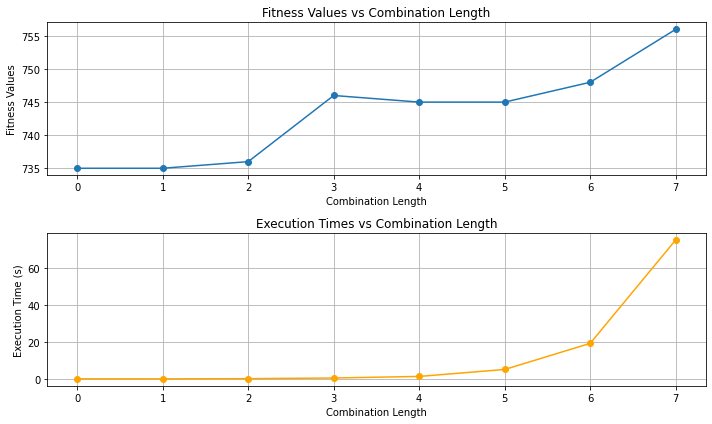

In [85]:
import matplotlib.pyplot as plt

iterations = table[:, 0]
fitness_values = table[:, 1]
execution_times = table[:, 2]

# Plotting fitness values against iterations
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(iterations, fitness_values, marker='o', linestyle='-')
plt.title('Fitness Values vs Combination Length')
plt.xlabel('Combination Length')
plt.ylabel('Fitness Values')
plt.grid(True)

# Plotting execution times against iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, execution_times, marker='o', linestyle='-', color='orange')
plt.title('Execution Times vs Combination Length')
plt.xlabel('Combination Length')
plt.ylabel('Execution Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Same but for the random adding of biscuits

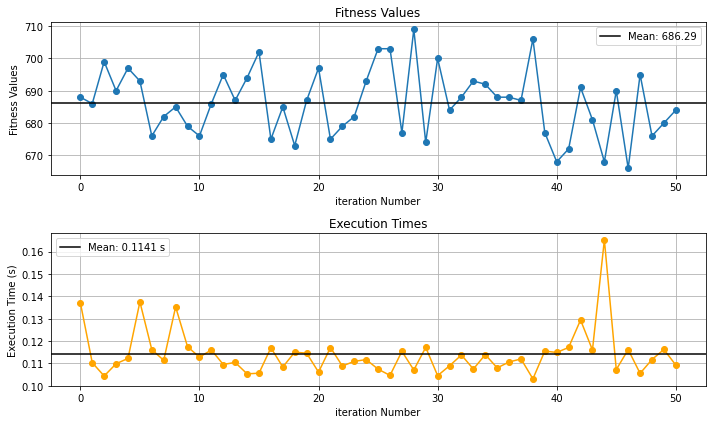

In [93]:
combi_length=50
table = np.zeros((combi_length+1,3))

for i in range (combi_length+1):
    start_time = time.perf_counter()

    greedy_dough = Dough_Roll(500,result_dict)

    while greedy_dough.greedy_add(biscuits):
        greedy_dough.random_add(biscuits)

    end_time = time.perf_counter()
    execution_time = end_time - start_time
    table[i] = i,greedy_dough.fitness_evaluator(biscuits),execution_time

import matplotlib.pyplot as plt

iterations = table[:, 0]
fitness_values = table[:, 1]
execution_times = table[:, 2]
mean_fitness = np.mean(fitness_values)
mean_execution_time = np.mean(execution_times)

# Plotting fitness values against iterations
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(iterations, fitness_values, marker='o', linestyle='-')
plt.axhline(y=mean_fitness, color='black', linestyle='-', label=f'Mean: {mean_fitness:.2f}')
plt.title('Fitness Values')
plt.xlabel('iteration Number')
plt.ylabel('Fitness Values')
plt.legend()
plt.grid(True)

# Plotting execution times against iterations
plt.subplot(2, 1, 2)
plt.plot(iterations, execution_times, marker='o', linestyle='-', color='orange')
plt.axhline(y=mean_execution_time, color='black', linestyle='-', label=f'Mean: {mean_execution_time:.4f} s')
plt.title('Execution Times')
plt.xlabel('iteration Number')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()